In [1]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

data = pd.read_csv('./OriginalData/training_input.csv',sep = ";")
target = pd.read_csv('./OriginalData/training_output.csv',sep =';')

In [48]:
data['TARGET'] = target['TARGET']

In [2]:
import re

keys_return = []

for key in data.keys():
    g = re.split('return',key)
    if len(g)>1:
        keys_return += [key]
        
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]
        
times = []

for key in keys_return:
    g = re.split('return (.+)',key)
    if len(g)>1:
        times += [g[1]]

cumulative_directions = np.cumsum(data[keys_return].T,axis = 0)

In [3]:
for k in range(len(times)):
    data["cumulative_direction " + times[k]] = cumulative_directions.T['return '+times[k]]

keys_cumul = []

for key in data.keys():
    g = re.split('cumulative_direction',key)
    if len(g)>1:
        keys_cumul += [key]    

        
for date in range(1,2117+1):
    markets = np.mean(data.loc[data['date'] == date],axis = 0)[keys_cumul].values
    for k in range(markets.shape[0]):
        data.set_value(data['date'] == date,'cumul_market ' + times[k],markets[k])

Trying to compute probabilities of going up at the next step. Average number of occurences over the data. Formulas are in notepad.

In [226]:
from scipy.special import erfc,erfcinv

def ComputeProba(sigma,delta = 5.0,r = 0.05):
    return erfc((sigma*sigma/2.0-r)*np.sqrt(delta)/(sigma))/2.0

def FindVolFromProba(p,delta = 1/12.0,r = 0.5):
    y = erfcinv(2.0*p)
    sigma = 1/np.sqrt(delta)*(y+ np.sqrt(y*y+delta*r))
    return sigma
    
vols_generator = np.vectorize(FindVolFromProba)
proba_generator = np.vectorize(ComputeProba)

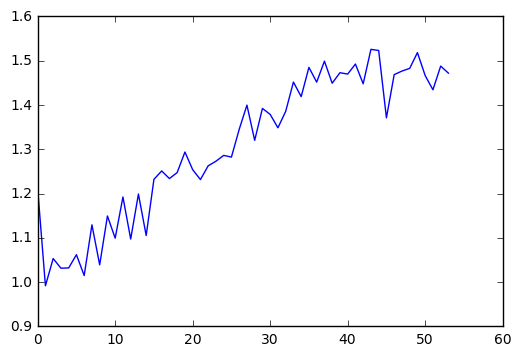

In [227]:
plt.clf()
plt.plot(vols_generator(np.mean(data[keys_return] >= 1)))
plt.show()

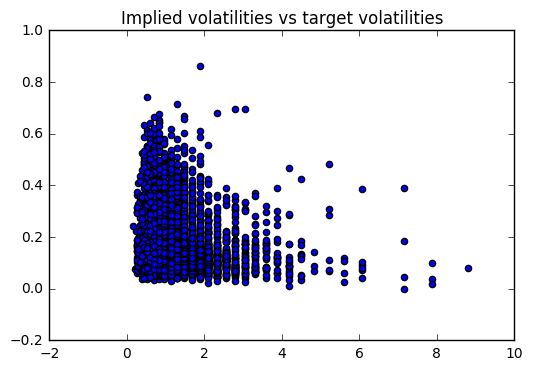

In [228]:
plt.clf()
plt.title('Implied volatilities vs target volatilities')
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 1][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 1]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 2][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 2]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 3][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 3]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 4][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 4]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 5][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 5]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 6][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 6]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 7][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 7]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 8][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 8]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 9][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 9]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 10][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 10]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 11][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 11]['TARGET'])
plt.scatter(vols_generator(np.mean(data.loc[data['date'] == 12][keys_return] >= 1,axis = 1)),data.loc[data['date'] == 12]['TARGET'])
plt.show()

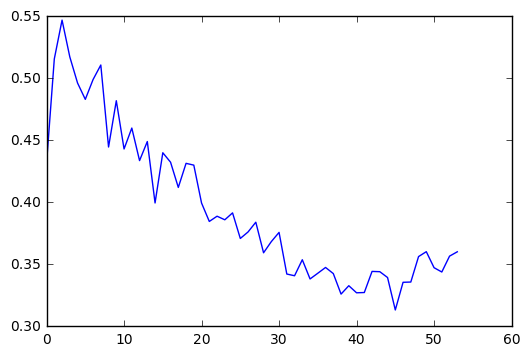

In [229]:
plt.clf()
plt.plot(vols_generator(1.0-np.mean(data[keys_return] == -1)))
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


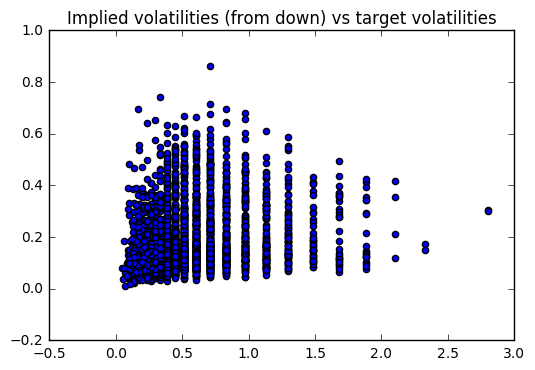

In [230]:
plt.clf()
plt.title('Implied volatilities (from down) vs target volatilities')
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 1][keys_return] == -1,axis = 1)),data.loc[data['date'] == 1]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 2][keys_return] == -1,axis = 1)),data.loc[data['date'] == 2]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 3][keys_return] == -1,axis = 1)),data.loc[data['date'] == 3]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 4][keys_return] == -1,axis = 1)),data.loc[data['date'] == 4]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 5][keys_return] == -1,axis = 1)),data.loc[data['date'] == 5]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 6][keys_return] == -1,axis = 1)),data.loc[data['date'] == 6]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 7][keys_return] == -1,axis = 1)),data.loc[data['date'] == 7]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 8][keys_return] == -1,axis = 1)),data.loc[data['date'] == 8]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 9][keys_return] == -1,axis = 1)),data.loc[data['date'] == 9]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 10][keys_return] == -1,axis = 1)),data.loc[data['date'] == 10]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 11][keys_return] == -1,axis = 1)),data.loc[data['date'] == 11]['TARGET'])
plt.scatter(vols_generator(1-np.mean(data.loc[data['date'] == 12][keys_return] == -1,axis = 1)),data.loc[data['date'] == 12]['TARGET'])
plt.show()

What if we compared to the volatilities measure from the data?

In [231]:
plt.clf()
plt.plot(vols_generator(np.mean(data[keys_return] == 1)))
plt.plot(np.mean(data[keys_volatility]))
plt.show()

ValueError: could not convert string to float: 'volatility 13:55:00'

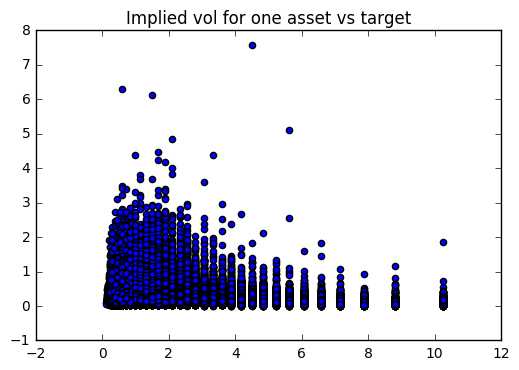

In [232]:
plt.clf()
plt.title('Implied vol for one asset vs target')
plt.scatter(vols_generator(np.mean(data[keys_return] >= 1,axis = 1)),data['TARGET'])
plt.show()

In [233]:
vols = vols_generator(np.mean(data[keys_return] >= 1,axis = 1))
data['IMPLIED_VOL'] = vols

In [234]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = copy_data["TARGET"].values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge(alpha = 1.0)

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [235]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.27094015239740959

In [236]:
N_products = 318

mape = []
coefs_importances = []

for n in range(1,1+N_products):

    copy_data = data.loc[data['product_id'] == n][keys_volatility+['TARGET','IMPLIED_VOL']].copy()
    copy_data = copy_data

    copy_data = copy_data.fillna(copy_data.median())
    copy_data = copy_data.replace(np.inf,copy_data.median())
    y = copy_data["TARGET"].values

    del copy_data['TARGET']

    X = copy_data.values

    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X,y)

    from sklearn.linear_model import Ridge

    model = Ridge()
    model.fit(X_train,y_train)
    mape += [np.mean(np.abs(model.predict(X_test) - y_test)/y_test)]
    coefs_importances += [model.coef_]
mape = np.array(mape)
coefs_importances = np.array(coefs_importances)

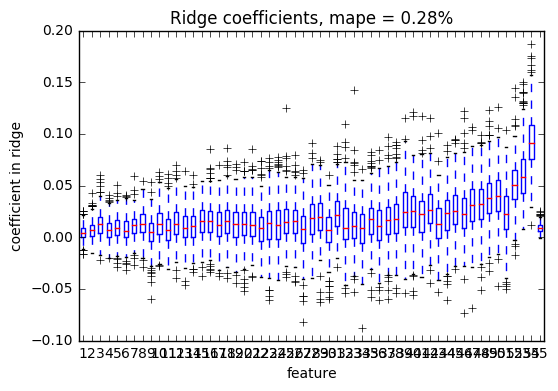

In [237]:
plt.clf()
plt.title("Ridge coefficients, mape = 0.28%")
plt.boxplot(coefs_importances)
plt.ylabel("coefficient in ridge")
plt.xlabel("feature")
plt.show()

In [195]:
data[keys_volatility+['IMPLIED_VOL']].keys().shape

(55,)

In [238]:
np.mean(mape)

0.27600681646914982

In [239]:
vols_generator(np.mean(data.loc[data['date'] == 1][keys_return] >= 1,axis = 1)).shape

(318,)

In [240]:
for date in range(1,2117+1):
    data.loc[data['date'] == date,'VOLS_INDIVIDUAL'] = vols_generator(1-np.mean(data.loc[data['date'] == date][keys_return] == -1,axis = 1))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


In [241]:
N_products = 318

mape = []
coefs_importances = []

for n in range(1,1+N_products):

    copy_data = data.loc[data['product_id'] == n][keys_volatility+['TARGET','IMPLIED_VOL','VOLS_INDIVIDUAL']].copy()
    copy_data = copy_data

    copy_data = copy_data.fillna(copy_data.median())
    copy_data = copy_data.replace(np.inf,copy_data.median())
    y = copy_data["TARGET"].values

    del copy_data['TARGET']

    X = copy_data.values

    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X,y)

    from sklearn.linear_model import Ridge

    model = Ridge()
    model.fit(X_train,y_train)
    mape += [np.mean(np.abs(model.predict(X_test) - y_test)/y_test)]
    coefs_importances += [model.coef_]
mape = np.array(mape)
coefs_importances = np.array(coefs_importances)

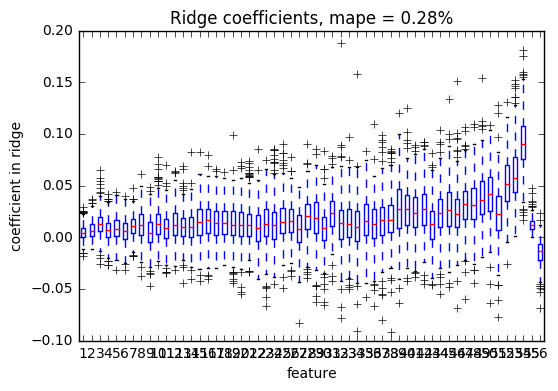

In [242]:
plt.clf()
plt.title("Ridge coefficients, mape = 0.28%")
plt.boxplot(coefs_importances)
plt.ylabel("coefficient in ridge")
plt.xlabel("feature")
plt.show()

In [243]:
data[['TARGET','IMPLIED_VOL','VOLS_INDIVIDUAL']].corr()

,TARGET,IMPLIED_VOL,VOLS_INDIVIDUAL
TARGET,1.000000,-0.090932,0.161410
IMPLIED_VOL,-0.090932,1.000000,0.086307
VOLS_INDIVIDUAL,0.161410,0.086307,1.000000


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars


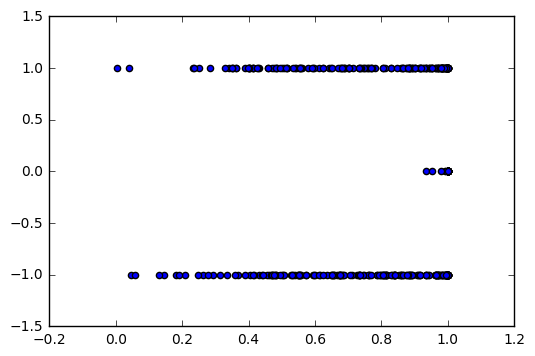

In [251]:
plt.clf()
plt.scatter((proba_generator(data[keys_volatility].values[0,:])),data[keys_return].values[0,:])
plt.scatter((proba_generator(data[keys_volatility].values[1,:])),data[keys_return].values[1,:])
plt.scatter((proba_generator(data[keys_volatility].values[2,:])),data[keys_return].values[2,:])
plt.scatter((proba_generator(data[keys_volatility].values[3,:])),data[keys_return].values[3,:])
plt.scatter((proba_generator(data[keys_volatility].values[4,:])),data[keys_return].values[4,:])
plt.scatter((proba_generator(data[keys_volatility].values[5,:])),data[keys_return].values[5,:])
plt.scatter((proba_generator(data[keys_volatility].values[6,:])),data[keys_return].values[6,:])
plt.show()

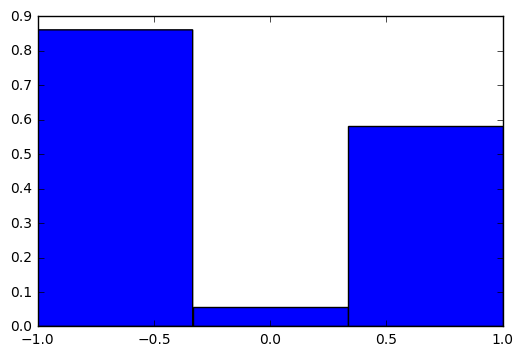

In [261]:
import seaborn as sns

plt.clf()
plt.hist(data[keys_return].dropna().values[0,:],normed = True,bins = 3)
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


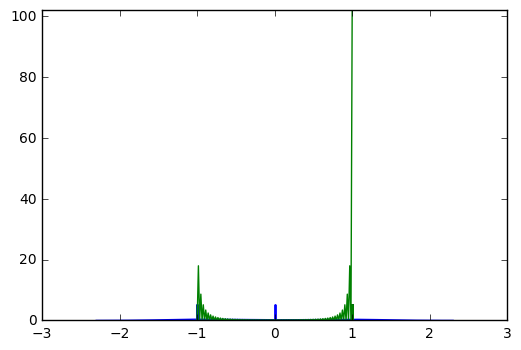

In [279]:
date = 4
w = (1*(proba_generator(data[keys_volatility].dropna().values[date,:])>=0.5) -1*(proba_generator(data[keys_volatility].dropna().values[date,:])<=0.5))
ww = data[keys_return].dropna().values[date,:]
plt.clf()
sns.distplot(ww, hist=False, rug=True)
sns.distplot(w,hist = False, rug = True)
plt.show()

In [286]:
date = 20
w = (1*(proba_generator(data[keys_volatility].dropna().values[date,:])>=0.5) -1*(proba_generator(data[keys_volatility].dropna().values[date,:])<=0.5))
ww = data[keys_return].dropna().values[date,:]
np.mean(w == ww)

0.46296296296296297

In [281]:
ww

array([ 1., -1.,  0.,  1.,  0., -1., -1., -1.,  1.,  1.,  0.,  0., -1.,
        1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  0.,  1., -1.,  0.,  1.,
        0., -1.,  1., -1.,  1., -1.,  1.,  1.,  0.,  1.,  0., -1., -1.,
       -1.,  0.])

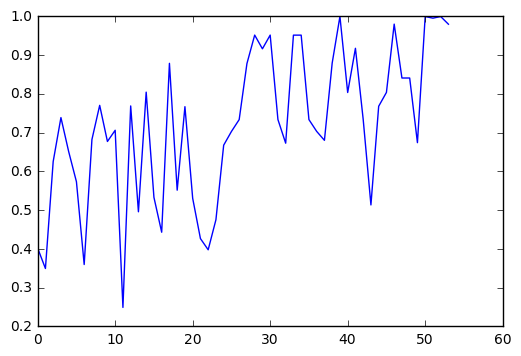

In [288]:
plt.plot((proba_generator(data[keys_volatility].values[6,:])))
plt.show()

In [313]:
(data[keys_return] >= 0) * (data[keys_volatility])

,return 09:30:00,return 09:35:00,return 09:40:00,return 09:45:00,return 09:50:00,return 09:55:00,return 10:00:00,return 10:05:00,return 10:10:00,return 10:15:00,...,volatility 13:10:00,volatility 13:15:00,volatility 13:20:00,volatility 13:25:00,volatility 13:30:00,volatility 13:35:00,volatility 13:40:00,volatility 13:45:00,volatility 13:50:00,volatility 13:55:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
changes = ((data[keys_volatility]).diff(axis = 1) >=0).values[:,1:]
return_changes = (data[keys_return]).values[:,0:-1]

In [359]:
values = return_changes*changes
values = np.nan_to_num(values)

In [360]:
np.mean(np.mean(values,axis = 1))

0.00015181801029509948

In [369]:
data[keys_return].rolling(window = 5,axis = 1).mean()

,return 09:30:00,return 09:35:00,return 09:40:00,return 09:45:00,return 09:50:00,return 09:55:00,return 10:00:00,return 10:05:00,return 10:10:00,return 10:15:00,...,return 13:10:00,return 13:15:00,return 13:20:00,return 13:25:00,return 13:30:00,return 13:35:00,return 13:40:00,return 13:45:00,return 13:50:00,return 13:55:00
0,NaN,NaN,NaN,NaN,-0.6,-0.6,-0.2,0.2,0.2,-0.2,...,0.2,0.2,0.6,0.6,0.6,0.2,0.0,0.0,0.4,0.0
1,NaN,NaN,NaN,NaN,0.4,0.0,0.0,-0.4,-0.2,0.2,...,0.4,0.4,0.6,1.0,1.0,0.6,0.2,0.2,-0.2,-0.6
2,NaN,NaN,NaN,NaN,0.2,0.2,0.6,0.6,0.6,0.2,...,0.6,0.6,0.2,0.2,0.2,0.2,-0.2,0.2,0.6,0.6
3,NaN,NaN,NaN,NaN,-0.2,-0.2,-0.6,-0.2,0.2,-0.2,...,-0.2,-0.2,0.2,0.4,0.4,0.4,0.0,-0.4,-0.6,-0.6
4,NaN,NaN,NaN,NaN,0.2,-0.2,-0.2,-0.4,-0.4,-0.2,...,-0.2,0.2,0.2,0.4,0.4,0.6,0.2,-0.2,-0.4,-0.6
5,NaN,NaN,NaN,NaN,0.2,-0.2,-0.2,0.2,0.2,0.6,...,-0.2,-0.6,-0.2,0.2,0.2,0.2,0.2,-0.2,-0.6,-1.0
6,NaN,NaN,NaN,NaN,0.2,-0.2,-0.6,-0.2,-0.2,0.2,...,-0.2,0.2,0.2,0.2,-0.2,-0.2,-0.4,-0.6,-0.4,-0.2
7,NaN,NaN,NaN,NaN,-0.6,-0.4,0.0,-0.2,0.2,0.6,...,0.2,0.2,0.4,0.6,0.6,0.2,-0.2,-0.2,-0.4,-0.8
8,NaN,NaN,NaN,NaN,0.6,0.6,0.6,0.6,0.6,0.6,...,-0.2,-0.2,0.2,0.2,0.2,0.2,-0.2,-0.6,-0.2,-0.2
9,NaN,NaN,NaN,NaN,-0.2,-0.2,-0.6,-0.8,-0.4,0.0,...,0.2,0.2,-0.2,-0.2,-0.2,-0.2,-0.6,-0.4,0.0,0.0


In [384]:
img = data[keys_return].rolling(window = 10,axis = 1).mean().fillna(0.0).values

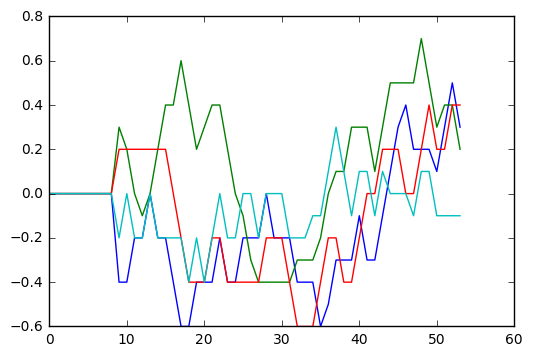

In [385]:
plt.clf()
plt.plot(img[0,:])
plt.plot(img[1,:])
plt.plot(img[2,:])
plt.plot(img[3,:])
plt.show()

In [388]:
np.corrcoef(data['TARGET'],img[:,-2])

array([[ 1.        , -0.02917006],
       [-0.02917006,  1.        ]])

In [390]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
pca.fit(data[keys_return].dropna())

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [392]:
pca.explained_variance_ratio_

array([ 0.02031067,  0.01988602,  0.01983713,  0.01959654,  0.01937251])

In [393]:
pca.components_

array([[  3.03008607e-01,  -4.32836111e-01,  -2.25977575e-01,
          2.28072350e-01,   3.58296750e-01,   2.23099826e-01,
         -2.39873501e-01,   2.10071959e-01,  -7.16902594e-03,
          5.37099412e-02,  -1.54979179e-02,   2.12352239e-01,
         -6.97655641e-02,   1.31060600e-01,  -1.09334052e-01,
          3.31502239e-04,   5.69572325e-02,   1.09319880e-01,
          5.34077769e-02,   1.10527057e-01,   2.12378654e-02,
         -9.88906478e-02,   5.74735105e-02,   2.00747196e-01,
          1.32046810e-01,  -5.21850902e-02,   2.58090706e-02,
          6.10744364e-02,   6.95466705e-03,   8.81706027e-02,
         -4.58344404e-02,   7.96463525e-02,   3.85996239e-02,
          9.11566761e-02,   8.58809055e-02,   8.03466931e-02,
          5.24168477e-02,   5.48283049e-02,  -4.02062555e-02,
         -5.82877995e-02,   4.10948580e-02,   1.61012387e-02,
          3.39059412e-02,  -8.23340608e-03,  -2.86037711e-02,
          1.80701857e-01,   1.08248844e-01,  -5.50631338e-02,
        

In [394]:
from sklearn.decomposition import FactorAnalysis

pca = FactorAnalysis(n_components = 5)
pca.fit(data[keys_return].dropna())

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=5,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [395]:
pca.noise_variance_

array([ 0.93292139,  0.94886546,  0.94502995,  0.93776546,  0.93307182,
        0.92420866,  0.92904698,  0.92450009,  0.91373968,  0.91497332,
        0.91590845,  0.91159947,  0.91301277,  0.90565268,  0.90356331,
        0.90046477,  0.89929835,  0.89538825,  0.89775983,  0.89456846,
        0.88787119,  0.88488047,  0.88203116,  0.87997625,  0.88485783,
        0.88023112,  0.8742599 ,  0.86996644,  0.87011582,  0.86758579,
        0.86801422,  0.86403073,  0.85856704,  0.86045321,  0.85855539,
        0.85223191,  0.85071628,  0.84992092,  0.84583518,  0.84946076,
        0.83960475,  0.84491066,  0.85192851,  0.84773792,  0.84699551,
        0.84478919,  0.84267905,  0.84924488,  0.85103605,  0.85473032,
        0.85463197,  0.8526284 ,  0.85226612,  0.85363898])

In [396]:
pca.components_

array([[-0.01859588,  0.01678699,  0.03647845,  0.02103569, -0.00498229,
        -0.0363425 ,  0.04109063,  0.01575026, -0.04221915, -0.01459604,
         0.00284067, -0.01724737,  0.0048387 , -0.01196566, -0.05114758,
        -0.00422653, -0.00402446, -0.04572981,  0.06597543, -0.04471983,
        -0.02135936,  0.03728889,  0.01154749, -0.05874166,  0.01036267,
        -0.00332294,  0.02878681,  0.01226212, -0.01294538, -0.02730244,
         0.03639377, -0.02977998, -0.00467238, -0.02143401, -0.01866841,
        -0.00845567, -0.00221056,  0.00317821,  0.0336888 ,  0.05726072,
        -0.03445011,  0.01569899,  0.00167477, -0.00913128, -0.00388118,
         0.00506658, -0.04690735,  0.0531983 ,  0.01158861,  0.00374524,
         0.04624435, -0.05657625, -0.00745467,  0.0469926 ],
       [ 0.01643549,  0.01383493,  0.02521881, -0.04194961, -0.07243408,
         0.01823141,  0.01840174,  0.00019002,  0.02046872, -0.01439142,
        -0.00115386, -0.02220137,  0.02139277, -0.05585998, -0.

In [401]:
img = data['VOLS_INDIVIDUAL'].values
plt.clf()
plt.imshow(img)
plt.show()

TypeError: Invalid dimensions for image data

In [402]:
img.shape

(636313,)

In [417]:
vals_1 = (data.loc[data['date'] == 1][keys_return] == 1)*1

row_1 = (vols_generator(vals_1.values[0,:]))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


In [418]:
row_1

array([ inf,  inf,  inf,  inf,  nan,  inf,  nan,  nan,  inf,  inf,  inf,
        nan,  inf,  nan,  inf,  inf,  inf,  inf,  inf,  nan,  inf,  nan,
        nan,  inf,  inf,  nan,  inf,  inf,  nan,  inf,  inf,  nan,  inf,
        inf,  inf,  inf,  inf,  nan,  nan,  inf,  nan,  inf,  inf,  nan,
        nan,  nan,  nan,  inf,  nan,  inf,  inf,  nan,  nan,  inf])

In [416]:
vals_1.values[0,:]*1sa

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0])

In [504]:
from sklearn.linear_model import LogisticRegression

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = ((copy_data["TARGET"] >= 0.3)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [505]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred == y_test))

0.93809974320854173

In [506]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97    279492
          1       0.82      0.63      0.71     38665

avg / total       0.93      0.94      0.93    318157

[[274117   5375]
 [ 14319  24346]]


In [480]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','VOLS_INDIVIDUAL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [481]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.3)*1
y_test = (y_test >= 0.3)*1

In [482]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96    279327
          1       0.75      0.71      0.73     38830

avg / total       0.93      0.94      0.93    318157

[[270118   9209]
 [ 11447  27383]]


Adding std to see if there is still a disparity...

In [468]:
data['STD'] = np.std(data[keys_return],axis = 1)

In [483]:
from sklearn.linear_model import LogisticRegression

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','VOLS_INDIVIDUAL','STD']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = ((copy_data["TARGET"] >= 0.3)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [484]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96    279140
          1       0.82      0.62      0.71     39017

avg / total       0.93      0.94      0.93    318157

[[273909   5231]
 [ 14789  24228]]


In [488]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','VOLS_INDIVIDUAL','STD']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [489]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.3)*1
y_test = (y_test >= 0.3)*1

In [490]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96    279318
          1       0.75      0.71      0.73     38839

avg / total       0.93      0.94      0.93    318157

[[270129   9189]
 [ 11321  27518]]


Low volatility predictions.

In [69]:
from sklearn.linear_model import LogisticRegression

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = ((copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90    376692
          1       0.72      0.67      0.69    132359

avg / total       0.84      0.85      0.84    509051

[[342129  34563]
 [ 43891  88468]]


In [527]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [528]:
y_pred = model.predict(X_test)
y_pred = (y_pred <= 0.1)*1
y_test = (y_test <= 0.1)*1

In [529]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90    235417
          1       0.74      0.60      0.66     82740

avg / total       0.84      0.84      0.84    318157

[[218386  17031]
 [ 33151  49589]]


In [530]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data.loc[copy_data['TARGET'] <= 0.1]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [531]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.1964354085474074

In [533]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data.loc[copy_data['TARGET'] >= 0.3]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [534]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.20418550898066765

In [542]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data.loc[copy_data['TARGET'] <= 0.3]
copy_data = copy_data.loc[copy_data['TARGET'] >= 0.1]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge(alpha = 1.0)

model.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [543]:
y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.18756647097467433

In [60]:
from sklearn.linear_model import LogisticRegression

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1 + 2*(copy_data["TARGET"] >= 0.3)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LogisticRegression(class_weight = 'balanced')

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.84      0.77      0.80    314522
          1       0.68      0.74      0.71    132359
          2       0.65      0.79      0.71     62170

avg / total       0.77      0.76      0.77    509051

[[241864  46111  26547]
 [ 34318  97927    114]
 [ 12446    386  49338]]


In [550]:
classes = model.predict(X)

In [552]:
data['CLASSES'] = classes

In [554]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','CLASSES']].copy()
copy_data = copy_data.loc[copy_data['CLASSES'] == 0]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.25721893360117459

In [555]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','CLASSES']].copy()
copy_data = copy_data.loc[copy_data['CLASSES'] == 1]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.30203479339466416

In [556]:
from sklearn.linear_model import Ridge

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL','CLASSES']].copy()
copy_data = copy_data.loc[copy_data['CLASSES'] == 2]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.25828995503897412

In [558]:
(314522*0.257+132359*0.30+ 62170*0.258)/509051

0.2683026140799252

In [562]:
data[keys_volatility+['TARGET','IMPLIED_VOL']].to_csv('data_with_vols.csv',index = False,sep = ';')

Start again without doing everything again.

In [67]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd


data = pd.read_csv('data_with_vols.csv',sep = ';')

In [68]:
import re

keys_return = []

for key in data.keys():
    g = re.split('return',key)
    if len(g)>1:
        keys_return += [key]
        
keys_volatility = []

for key in data.keys():
    g = re.split('volatility',key)
    if len(g)>1:
        keys_volatility += [key]
        
times = []

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = ((copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = LinearSVC(C = 1e2)

model.fit(X_train,y_train)

LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.87      0.89    235391
          1       0.67      0.75      0.71     82766

avg / total       0.85      0.84      0.84    318157

[[204065  31326]
 [ 20437  62329]]


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

copy_data = data[keys_volatility+['TARGET','IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = ((copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = GradientBoostingClassifier()

model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90    235391
          1       0.73      0.64      0.68     82766

avg / total       0.84      0.85      0.84    318157

[[215969  19422]
 [ 29716  53050]]


In [49]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters = 3,random_state= 1)

copy_data = data[keys_volatility+['IMPLIED_VOL']].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())

X = copy_data.values

clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [51]:
centers = clustering.cluster_centers_
from scipy.spatial.distance import cosine
from scipy.spatial import minkowski_distance

i = 0
cosine_distances = np.array([cosine(X[k,:],centers[i]) for k in range(index.shape[0])])
l2_distances = np.array([minkowski_distance(X[k,:],centers[i],2) for k in range(index.shape[0])])
data['distance_cosine_c0'] = cosine_distances
data['distance_l2_c0']= l2_distances

i = 1
cosine_distances = np.array([cosine(X[k,:],centers[i]) for k in range(index.shape[0])])
l2_distances = np.array([minkowski_distance(X[k,:],centers[i],2) for k in range(index.shape[0])])
data['distance_cosine_c1'] = cosine_distances
data['distance_l2_c1']= l2_distances

i = 2
cosine_distances = np.array([cosine(X[k,:],centers[i]) for k in range(index.shape[0])])
l2_distances = np.array([minkowski_distance(X[k,:],centers[i],2) for k in range(index.shape[0])])
data['distance_cosine_c2'] = cosine_distances
data['distance_l2_c2']= l2_distances

In [52]:
data.keys().shape

(62,)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1 + 2*(copy_data["TARGET"] >= 0.3)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LogisticRegression(class_weight = 'balanced')

model.fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80    314522
          1       0.66      0.74      0.70    132359
          2       0.69      0.75      0.72     62170

avg / total       0.77      0.76      0.77    509051

[[244611  49032  20879]
 [ 34087  98186     86]
 [ 15297    452  46421]]


In [66]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LinearSVC(class_weight = 'balanced')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85    376692
          1       0.58      0.88      0.70    132359

avg / total       0.85      0.80      0.81    509051

[[291540  85152]
 [ 15373 116986]]


In [13]:
[[342129  34563]
 [ 43891  88468]]

array([ 0.19604886,  0.19604886,  0.19604886, ...,  0.19604886,
        0.10689781,  0.19604886])

In [90]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

clf = LinearSVC(C = 1e-0,class_weight = 'balanced')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85    376692
          1       0.58      0.88      0.70    132359

avg / total       0.85      0.80      0.81    509051

[[291535  85157]
 [ 15374 116985]]


In [92]:
predictions = clf.predict(X)

In [93]:
data['PREDICTIONS'] = predictions

Train for small classes.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

copy_data = data.copy()
copy_data = copy_data.loc[data['PREDICTIONS'] == 1]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data[keys_volatility].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = LinearSVR()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.25676649802304657

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

copy_data = data.copy()
copy_data = copy_data.loc[data['PREDICTIONS'] == 0]
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data[keys_volatility].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 1)

model = LinearSVR()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.23296809198165302

In [105]:
data.loc[data['PREDICTIONS'] == 1].to_csv('low_volatility.csv',index = False,sep = ';')

In [81]:
from sklearn.linear_model import Ridge

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (copy_data["TARGET"]).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
y_pred = model.predict(X_test)
y_pred = (y_pred <= 0.1)*1
y_test = (y_test <= 0.1)*1

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90    376549
          1       0.75      0.59      0.66    132502

avg / total       0.84      0.84      0.84    509051

[[350436  26113]
 [ 54306  78196]]


Maybe we could try to pick up correlations between the low volatility regimes of different assets.

In [106]:
data.head()

,volatility 09:30:00,volatility 09:35:00,volatility 09:40:00,volatility 09:45:00,volatility 09:50:00,volatility 09:55:00,volatility 10:00:00,volatility 10:05:00,volatility 10:10:00,volatility 10:15:00,...,volatility 13:25:00,volatility 13:30:00,volatility 13:35:00,volatility 13:40:00,volatility 13:45:00,volatility 13:50:00,volatility 13:55:00,TARGET,IMPLIED_VOL,PREDICTIONS
0,0.662737,0.716896,0.698601,0.480172,0.623665,0.201876,0.327206,0.374239,0.207611,0.213038,...,0.274345,0.393201,0.078658,0.041951,0.115287,0.136218,0.052386,0.134168,1.680162,0
1,0.285394,0.379560,0.094858,0.094794,0.055315,0.173994,0.102745,0.079102,0.047445,0.071119,...,0.078995,0.220849,0.142118,0.039484,0.055287,0.059276,0.071155,0.046126,0.829940,1
2,1.151646,1.093562,1.833443,0.595823,0.310177,0.792310,0.401979,0.336490,0.619155,0.504735,...,0.262916,0.341119,0.170464,0.275906,0.196799,0.111488,0.117980,0.144312,0.829940,0
3,0.835260,0.329615,0.340366,0.216692,0.350371,0.247594,0.341194,0.175573,0.278420,0.113430,...,0.031052,0.217124,0.186312,0.051811,0.093239,0.082934,0.155294,0.130176,1.299637,0
4,0.274185,0.061076,0.010168,0.060890,0.000000,0.213162,0.162763,0.203675,0.456380,0.303923,...,0.020390,0.162940,0.040744,0.122338,0.050963,0.112193,0.000000,0.085873,1.680162,1


In [107]:
previous_data = pd.read_csv('./OriginalData/training_input.csv',sep = ";")

In [109]:
data.values.reshape(2117,data.shape[0]/2117)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


ValueError: total size of new array must be unchanged

In [110]:
data.shape

(636313, 57)

In [149]:
data['TARGET'].loc[previous_data['date'] == date].values.shape

(318,)

In [262]:
list_imgs = []

for date in range(1,2117+1):
    img = ((data['TARGET'].loc[previous_data['date'] == date] <= 0.1)*1).values
    list_imgs += [img]
list_imgs = np.array(list_imgs)

In [263]:
res = pd.DataFrame()
for k in range(2117):
    res = pd.concat([res, pd.DataFrame(list_imgs[k]).T])

In [264]:
res = res.fillna(res.median())

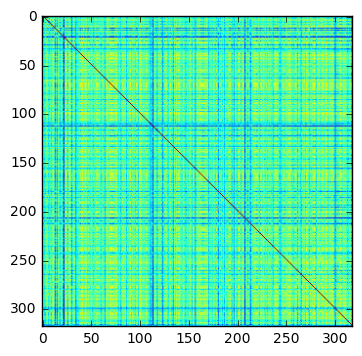

In [265]:
plt.show()
plt.imshow(res.corr())
plt.show()

In [380]:
res

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,0,1,0,0,1,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,1,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0,0,0,0,0,1,0,0,1,0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,0,1,1,1,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [266]:
from sklearn.metrics.pairwise import pairwise_distances

In [276]:
distances = pairwise_distances(res.values.T,metric = 'cityblock')
delta = 5 * 1e2
similarity = np.exp(- distances ** 2 / (2. * delta ** 2))

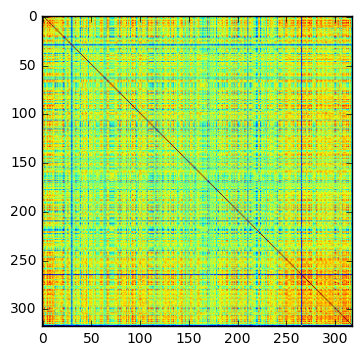

In [277]:
plt.show()
plt.imshow(similarity)
plt.show()

In [278]:
from sklearn.cluster import SpectralClustering


cluster = SpectralClustering(n_clusters = 20)
cluster.fit(similarity)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=20, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

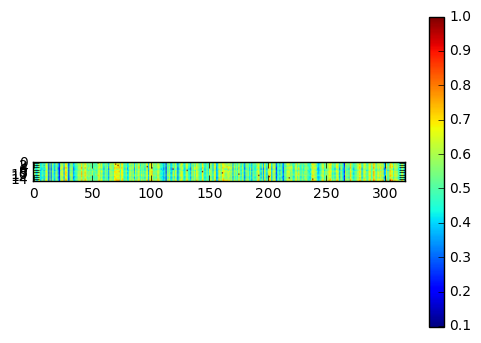

In [279]:
plt.clf()
plt.imshow(similarity[cluster.labels_ == 0])
plt.colorbar()
plt.show()

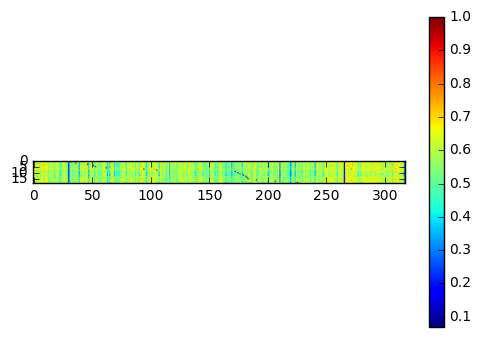

In [280]:
plt.clf()
plt.imshow(similarity[cluster.labels_ == 1])
plt.colorbar()
plt.show()

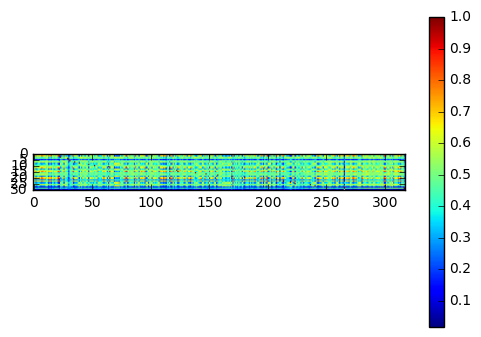

In [281]:
plt.clf()
plt.imshow(similarity[cluster.labels_ == 2])
plt.colorbar()
plt.show()

In [294]:
ind, = np.where(cluster.labels_ == 2)
ind = ind+1

In [310]:
bool_cluster = (previous_data['product_id'] == ind[0])*1
for k in range(1,len(ind)):
    bool_cluster += (previous_data['product_id'] == ind[k])*1
bool_cluster = bool_cluster.values

In [319]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values[bool_cluster == 1]

del copy_data['TARGET']

X = copy_data.values[bool_cluster == 1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LinearSVC(class_weight = 'balanced')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.76      0.84     33064
          1       0.63      0.89      0.74     15223

avg / total       0.84      0.80      0.81     48287

[[25167  7897]
 [ 1689 13534]]


In [320]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values[bool_cluster == 1]

del copy_data['TARGET']

X = copy_data.values[bool_cluster == 1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = LogisticRegression(class_weight = 'balanced')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.78      0.85     33064
          1       0.65      0.87      0.74     15223

avg / total       0.84      0.81      0.82     48287

[[25918  7146]
 [ 1990 13233]]


Run test for all products now.

In [321]:
N = 20

for n in range(N):
    ind, = np.where(cluster.labels_ == n)
    ind = ind+1

    bool_cluster = (previous_data['product_id'] == ind[0])*1
    for k in range(1,len(ind)):
        bool_cluster += (previous_data['product_id'] == ind[k])*1
    bool_cluster = bool_cluster.values

    copy_data = data.copy()
    copy_data = copy_data

    copy_data = copy_data.fillna(copy_data.median())
    copy_data = copy_data.replace(np.inf,copy_data.median())
    y = (1*(copy_data["TARGET"] <= 0.1)*1).values[bool_cluster == 1]

    del copy_data['TARGET']

    X = copy_data.values[bool_cluster == 1]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

    model = LinearSVC(class_weight = 'balanced')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.75      0.82     15762
          1       0.69      0.89      0.78      9950

avg / total       0.83      0.80      0.80     25712

[[11802  3960]
 [ 1135  8815]]
             precision    recall  f1-score   support

          0       0.94      0.77      0.85     22492
          1       0.55      0.85      0.67      7248

avg / total       0.85      0.79      0.80     29740

[[17335  5157]
 [ 1061  6187]]
             precision    recall  f1-score   support

          0       0.94      0.76      0.84     33064
          1       0.63      0.89      0.74     15223

avg / total       0.84      0.80      0.81     48287

[[25180  7884]
 [ 1707 13516]]
             precision    recall  f1-score   support

          0       0.97      0.82      0.89     30591
          1       0.46      0.84      0.60      5581

avg / total       0.89      0.83      0.84     36172

[[25177  5414]
 [  913  4668]]
             pre

In [322]:
299+679+1116+1020+768+1299+1036+965+255+736+735+1010+728+1031+501+130+913+1707+1061+1135

17124

Not doing better by training separately. But maybe by adding classifiers' predictions as values.

In [326]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

clf = LogisticRegression(class_weight = 'balanced')

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.78      0.86    376692
          1       0.58      0.88      0.70    132359

avg / total       0.85      0.81      0.82    509051

[[293771  82921]
 [ 16098 116261]]


In [327]:
data['PREDICTIONS'] = clf.predict(X)

In [328]:
list_preds = []

for date in range(1,2117+1):
    pred = ((data['PREDICTIONS'].loc[previous_data['date'] == date])).values
    list_preds += [pred]
list_preds = np.array(list_preds)

In [329]:
res_preds = pd.DataFrame()
for k in range(2117):
    res_preds = pd.concat([res_preds, pd.DataFrame(list_preds[k]).T])

In [341]:
data.loc[previous_data['date'] == 1,'PREDICTIONS_1'] = res_preds[ind].values[0,:]

ValueError: Must have equal len keys and value when setting with an iterable

In [338]:
res_preds[ind].values[:,0].shape

(2117,)

In [340]:
data.loc[previous_data['date'] == 1].shape

(318, 58)

In [343]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1,n_jobs = 5)

clf = XGBClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.88      0.89    376692
          1       0.68      0.72      0.70    132359

avg / total       0.84      0.84      0.84    509051

[[332341  44351]
 [ 36741  95618]]


In [344]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

copy_data = data.copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = (1*(copy_data["TARGET"] <= 0.1)*1).values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

clf = XGBClassifier(booster = 'gblinear',n_jobs = 5)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.88      0.89    376692
          1       0.68      0.74      0.71    132359

avg / total       0.85      0.84      0.84    509051

[[329753  46939]
 [ 34401  97958]]


In [375]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['PREDICTIONS'] == 0].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = copy_data["TARGET"].values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.25805101149119786

In [376]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['PREDICTIONS'] == 1].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = copy_data["TARGET"].values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = XGBRegressor(booster = 'gbtree',n_jobs = 5)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

0.29272047108591381

In [379]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['PREDICTIONS'] == 1].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,100.0)
copy_data = copy_data.replace(-np.inf,-100.0)
y = copy_data["TARGET"].values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

copy_data = data.loc[data['PREDICTIONS'] == 0].copy()
copy_data = copy_data
    
copy_data = copy_data.fillna(copy_data.median())
copy_data = copy_data.replace(np.inf,copy_data.median())
y = copy_data["TARGET"].values

del copy_data['TARGET']

X = copy_data.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8,random_state = 1)

model = Ridge()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
np.mean(np.abs(y_pred - y_test)/y_test)

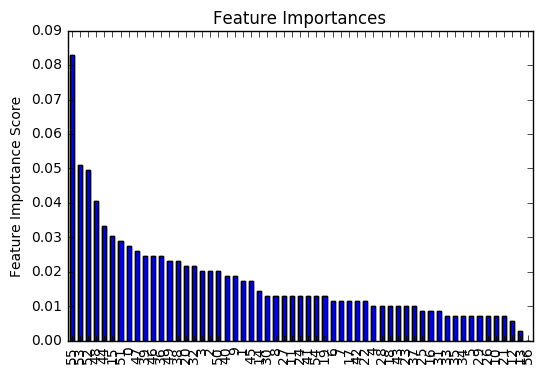

In [364]:
feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [365]:
feat_imp

55    0.082849
53    0.050872
52    0.049419
48    0.040698
44    0.033430
15    0.030523
51    0.029070
0     0.027616
47    0.026163
39    0.024709
46    0.024709
36    0.024709
49    0.023256
38    0.023256
20    0.021802
32    0.021802
3     0.020349
2     0.020349
50    0.020349
40    0.018895
9     0.018895
1     0.017442
45    0.017442
14    0.014535
30    0.013081
8     0.013081
27    0.013081
11    0.013081
24    0.013081
41    0.013081
54    0.013081
19    0.013081
6     0.011628
7     0.011628
17    0.011628
42    0.011628
22    0.011628
4     0.010174
28    0.010174
18    0.010174
43    0.010174
23    0.010174
37    0.010174
25    0.008721
16    0.008721
31    0.008721
33    0.007267
35    0.007267
34    0.007267
5     0.007267
29    0.007267
26    0.007267
10    0.007267
21    0.007267
12    0.005814
13    0.002907
56    0.000000
dtype: float32

In [371]:
copy_data.columns

Index(['volatility 09:30:00', 'volatility 09:35:00', 'volatility 09:40:00',
       'volatility 09:45:00', 'volatility 09:50:00', 'volatility 09:55:00',
       'volatility 10:00:00', 'volatility 10:05:00', 'volatility 10:10:00',
       'volatility 10:15:00', 'volatility 10:20:00', 'volatility 10:25:00',
       'volatility 10:30:00', 'volatility 10:35:00', 'volatility 10:40:00',
       'volatility 10:45:00', 'volatility 10:50:00', 'volatility 10:55:00',
       'volatility 11:00:00', 'volatility 11:05:00', 'volatility 11:10:00',
       'volatility 11:15:00', 'volatility 11:20:00', 'volatility 11:25:00',
       'volatility 11:30:00', 'volatility 11:35:00', 'volatility 11:40:00',
       'volatility 11:45:00', 'volatility 11:50:00', 'volatility 11:55:00',
       'volatility 12:00:00', 'volatility 12:05:00', 'volatility 12:10:00',
       'volatility 12:15:00', 'volatility 12:20:00', 'volatility 12:25:00',
       'volatility 12:30:00', 'volatility 12:35:00', 'volatility 12:40:00',
       'vola

In [372]:
data['PREDICTIONS']

0         0
1         1
2         0
3         0
4         1
5         1
6         0
7         0
8         1
9         0
10        1
11        1
12        0
13        0
14        1
15        0
16        1
17        0
18        0
19        0
20        1
21        0
22        0
23        1
24        0
25        1
26        0
27        1
28        1
29        0
         ..
636283    1
636284    0
636285    0
636286    0
636287    1
636288    0
636289    1
636290    1
636291    1
636292    1
636293    1
636294    0
636295    1
636296    1
636297    1
636298    1
636299    1
636300    0
636301    0
636302    0
636303    1
636304    1
636305    1
636306    0
636307    1
636308    0
636309    1
636310    0
636311    1
636312    1
Name: PREDICTIONS, dtype: int32